In [1]:
library(readr)
library(dplyr)
library(ggplot2)
library(tidyr)
library(repr)
options(repr.plot.width=6, repr.plot.height=4)

Warning message:
"package 'readr' was built under R version 3.6.2"Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'tidyr' was built under R version 3.6.2"

In [2]:
data <- read_csv('datafile.csv')

Parsed with column specification:
cols(
  .default = col_double(),
  State = col_character(),
  state_code = col_character(),
  region = col_character(),
  governor = col_character(),
  psychRegions = col_character()
)
See spec(...) for full column specifications.


### Piping the categorical data. Dropping the state_code since it does not add any significance to already existing State column.

In [3]:
categorical_data <- data %>% select(State, region, governor, psychRegions) %>% arrange(region)

In [4]:
categorical_data[1:5,]

State,region,governor,psychRegions
Illinois,Midwest,Republican,Friendly and Conventional
Indiana,Midwest,Republican,Friendly and Conventional
Iowa,Midwest,Republican,Friendly and Conventional
Kansas,Midwest,Republican,Friendly and Conventional
Michigan,Midwest,Republican,Friendly and Conventional


In [5]:
summary(categorical_data)

    State              region            governor         psychRegions      
 Length:48          Length:48          Length:48          Length:48         
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  

### Summary for Region and Governor

In [6]:
table(categorical_data$region, categorical_data$governor)

           
            Democrat Republican
  Midwest          1         11
  Northeast        5          4
  South            4         12
  West             5          6

#### We can see Midwesnt and South are heavily republican region where as Northeast and West have no such distinction. Visual representation of the same in stacked bar chart.

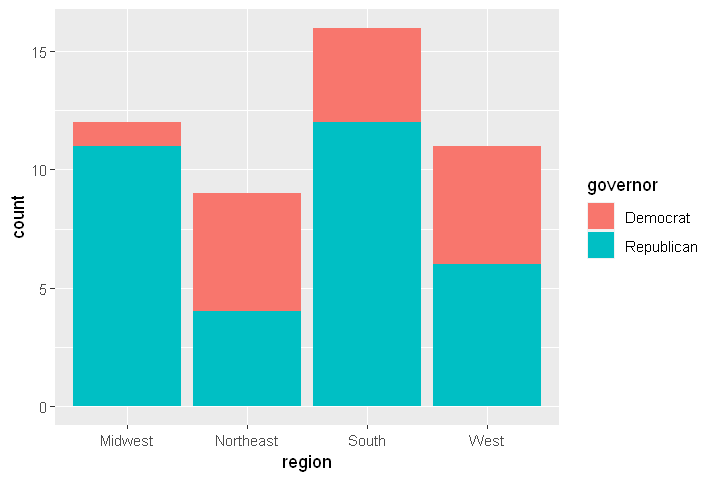

In [7]:
ggplot(categorical_data, aes(x = region, fill=governor))+ geom_bar()

### Summary for Region and Pysch

           
            Friendly and Conventional Relaxed and Creative
  Midwest                          11                    0
  Northeast                         0                    0
  South                            10                    2
  West                              3                    8
           
            Temperamental and Uninhibited
  Midwest                               1
  Northeast                             9
  South                                 4
  West                                  0

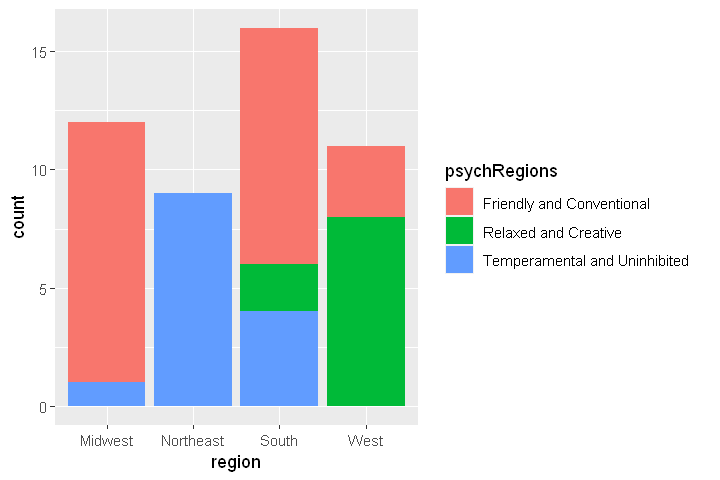

In [8]:
table(categorical_data$region, categorical_data$psychRegions)
ggplot(categorical_data, aes(x = region, fill=psychRegions))+ geom_bar()

### Summary for Governor and Psych

            
             Friendly and Conventional Relaxed and Creative
  Democrat                           4                    5
  Republican                        20                    5
            
             Temperamental and Uninhibited
  Democrat                               6
  Republican                             8

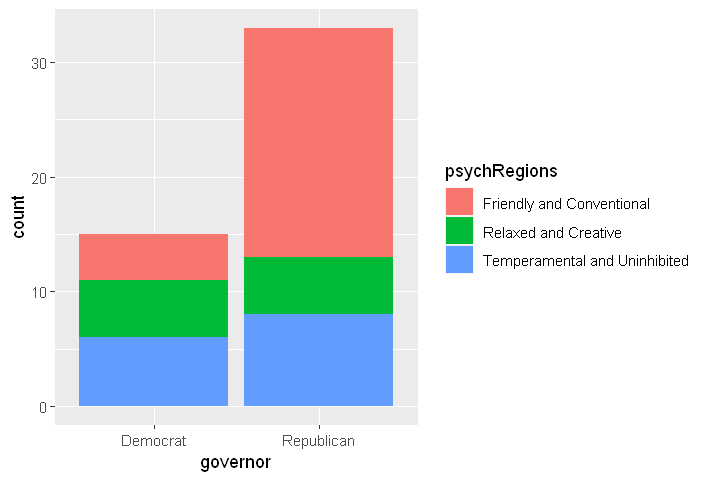

In [9]:
table(categorical_data$governor, categorical_data$psychRegions)
ggplot(categorical_data, aes(x = governor, fill=psychRegions))+ geom_bar()

### Complete categorical summary


In [10]:
table(categorical_data$region, categorical_data$psychRegions, categorical_data$governor)

, ,  = Democrat

           
            Friendly and Conventional Relaxed and Creative
  Midwest                           1                    0
  Northeast                         0                    0
  South                             1                    2
  West                              2                    3
           
            Temperamental and Uninhibited
  Midwest                               0
  Northeast                             5
  South                                 1
  West                                  0

, ,  = Republican

           
            Friendly and Conventional Relaxed and Creative
  Midwest                          10                    0
  Northeast                         0                    0
  South                             9                    0
  West                              1                    5
           
            Temperamental and Uninhibited
  Midwest                               1
  Northeast                    

## Descriptive data for entire data frame

In [11]:
quant_data <- data %>% select(-c(State, state_code, region, governor, psychRegions))

Descriptive statistics of quantitative data

In [12]:
summary(quant_data)

  extraversion   agreeableness   conscientiousness  neuroticism   
 Min.   :26.50   Min.   :29.80   Min.   :24.00     Min.   :30.40  
 1st Qu.:44.35   1st Qu.:45.77   1st Qu.:43.05     1st Qu.:43.85  
 Median :51.15   Median :52.05   Median :51.35     Median :49.00  
 Mean   :49.70   Mean   :50.59   Mean   :50.12     Mean   :50.19  
 3rd Qu.:56.05   3rd Qu.:56.62   3rd Qu.:56.12     3rd Qu.:56.92  
 Max.   :69.80   Max.   :69.40   Max.   :69.60     Max.   :79.20  
    openness       instagram           facebook           retweet        
 Min.   :21.80   Min.   :-1.70000   Min.   :-1.57000   Min.   :-2.53000  
 1st Qu.:42.70   1st Qu.:-0.89250   1st Qu.:-0.42750   1st Qu.:-0.52500  
 Median :49.85   Median :-0.12500   Median :-0.05000   Median : 0.03500  
 Mean   :49.43   Mean   :-0.03375   Mean   : 0.09563   Mean   : 0.02146  
 3rd Qu.:56.67   3rd Qu.: 0.65000   3rd Qu.: 0.81500   3rd Qu.: 0.45750  
 Max.   :65.00   Max.   : 1.82000   Max.   : 2.25000   Max.   : 1.79000  
  entrepreneu

#### Quartiles for facebook are min = -1.57, 25 %ile = -0.4275, Median or 50 %ile = -0.05, 75%ile = 0.815 and 100%ile = 2.25

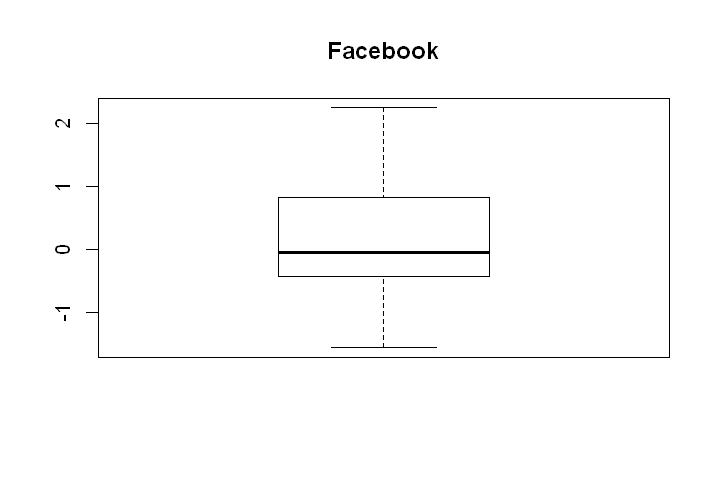

In [13]:
boxplot(quant_data$facebook, main = "Facebook")

### Explanation: The bottomand top whiskers of boxplot represent the minimum i.e. 0 percentile and maximum i.e. 100 percentile respectively. The thick middle line represent the median which is 50 percentile. The botton rectangle region is where the 25 percentile to 50 percentile region like and top rectangle is where 50 to 75 percentile of readings lie.

### We will generate a scatter plot matrix to have a look at relations between the variables.


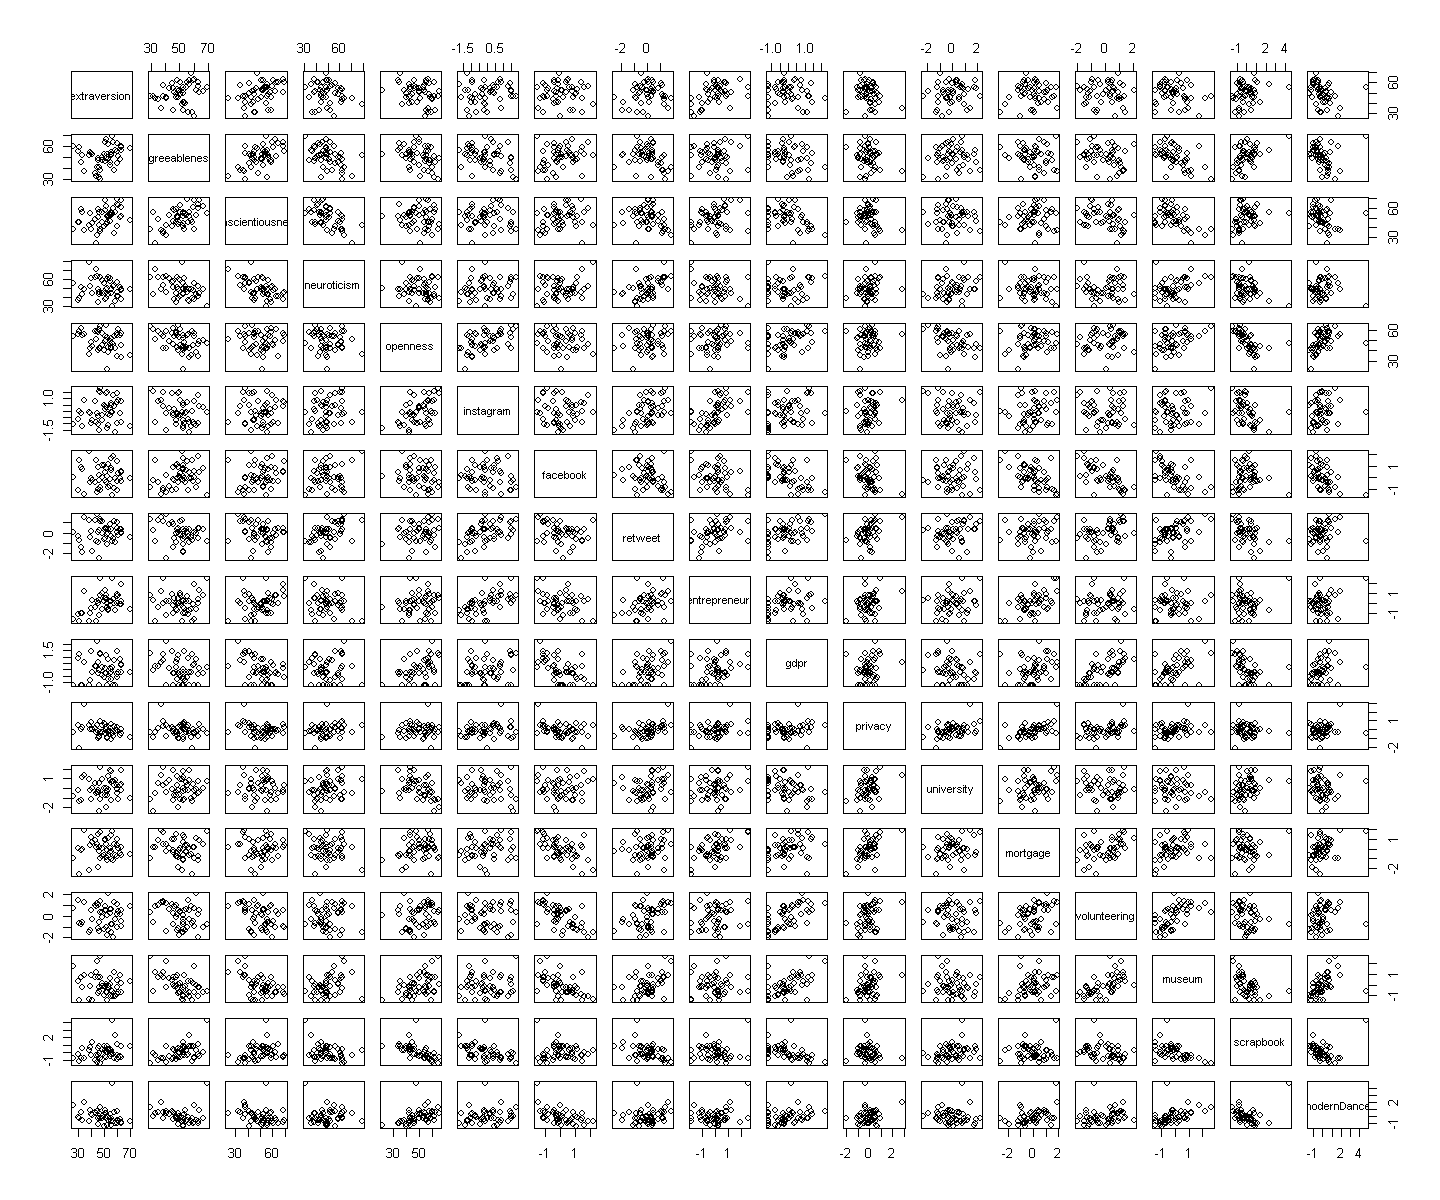

In [36]:
options(repr.plot.width=12, repr.plot.height=10)
pairs(quant_data)

### To double check we use correlation matrix to select variable that are correlated for regression analysis.

In [15]:
correlation = cor(quant_data, method = "pearson")

In [16]:
library(corrplot)

Warning message:
"package 'corrplot' was built under R version 3.6.3"corrplot 0.84 loaded


#### We select 2 variables where correlation is more than 0.5 or less than -0.5.

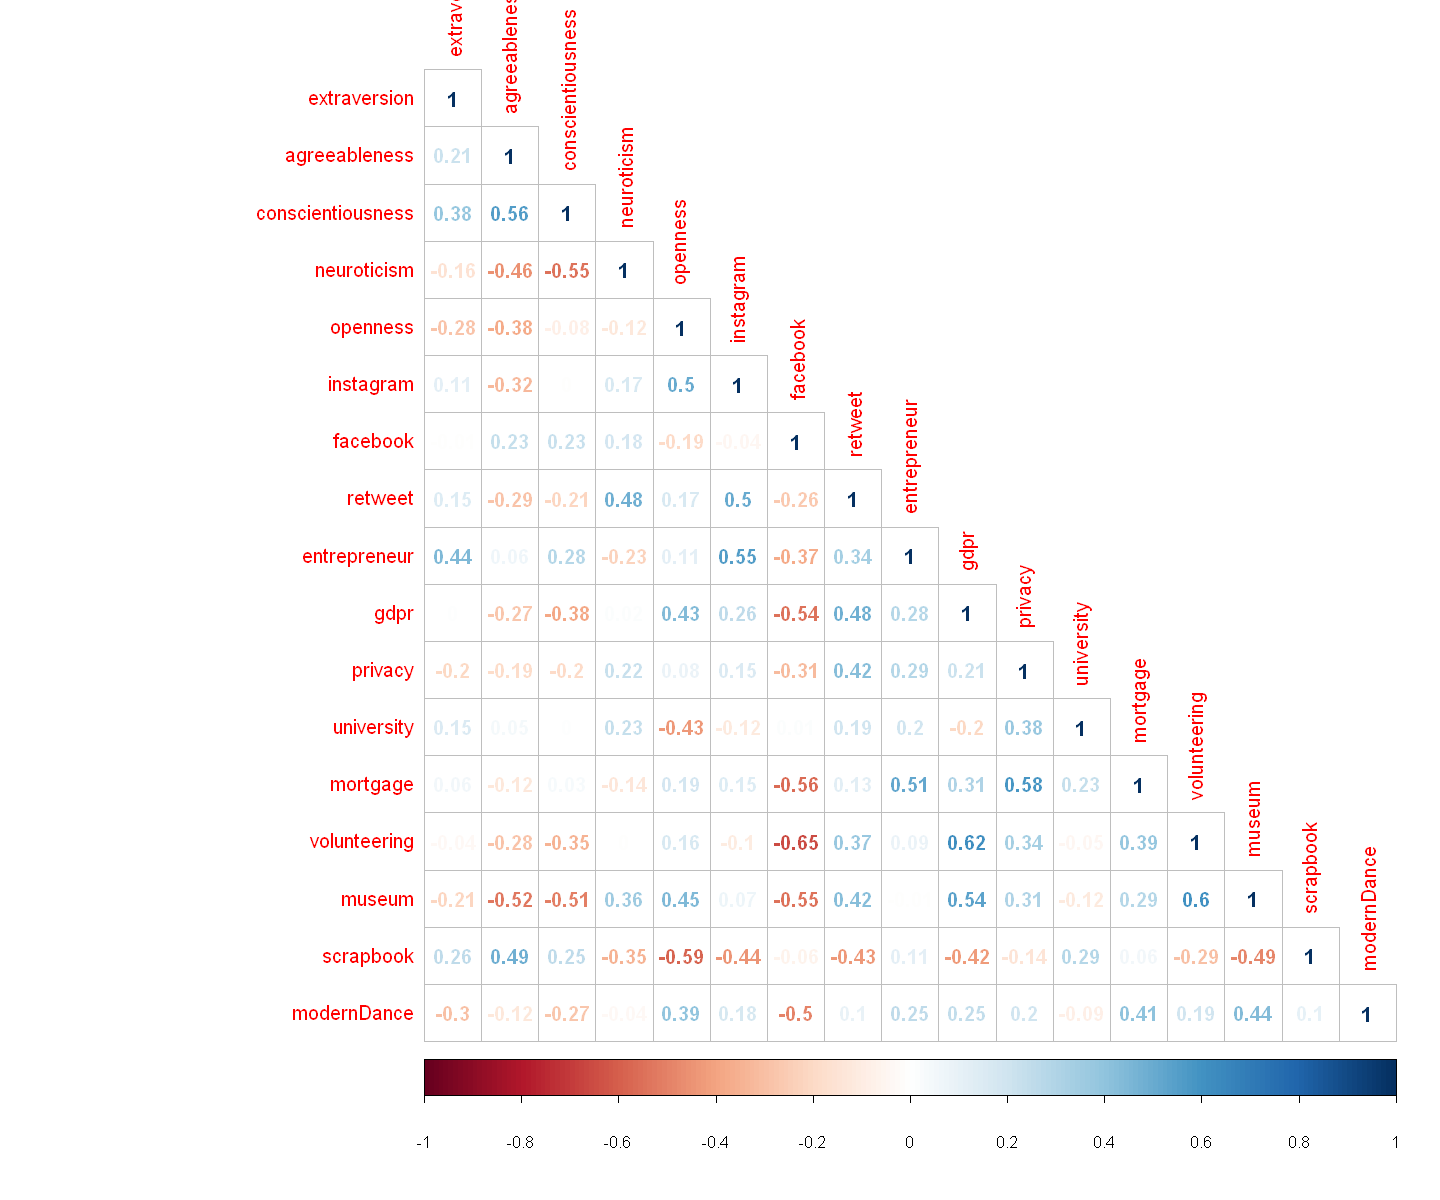

In [17]:
corrplot(correlation, method="number", type="lower")

### Combining scatterplot with rgression line and correlation matrix in one chart.

In [24]:
reg <- function(x, y, ...) {
  points(x,y, ...)
  abline(lm(y~x)) 
  }

panel.cor <- function(x, y, digits = 2, prefix = "", cex.cor, ...)
{
  usr <- par("usr"); on.exit(par(usr))
  par(usr = c(0, 1, 0, 1))
  r <- abs(cor(x, y))
  txt <- format(c(r, 0.123456789), digits = digits)[1]
  txt <- paste0(prefix, txt)
  text(0.5, 0.5, txt, cex = 1.1, font = 4)
}

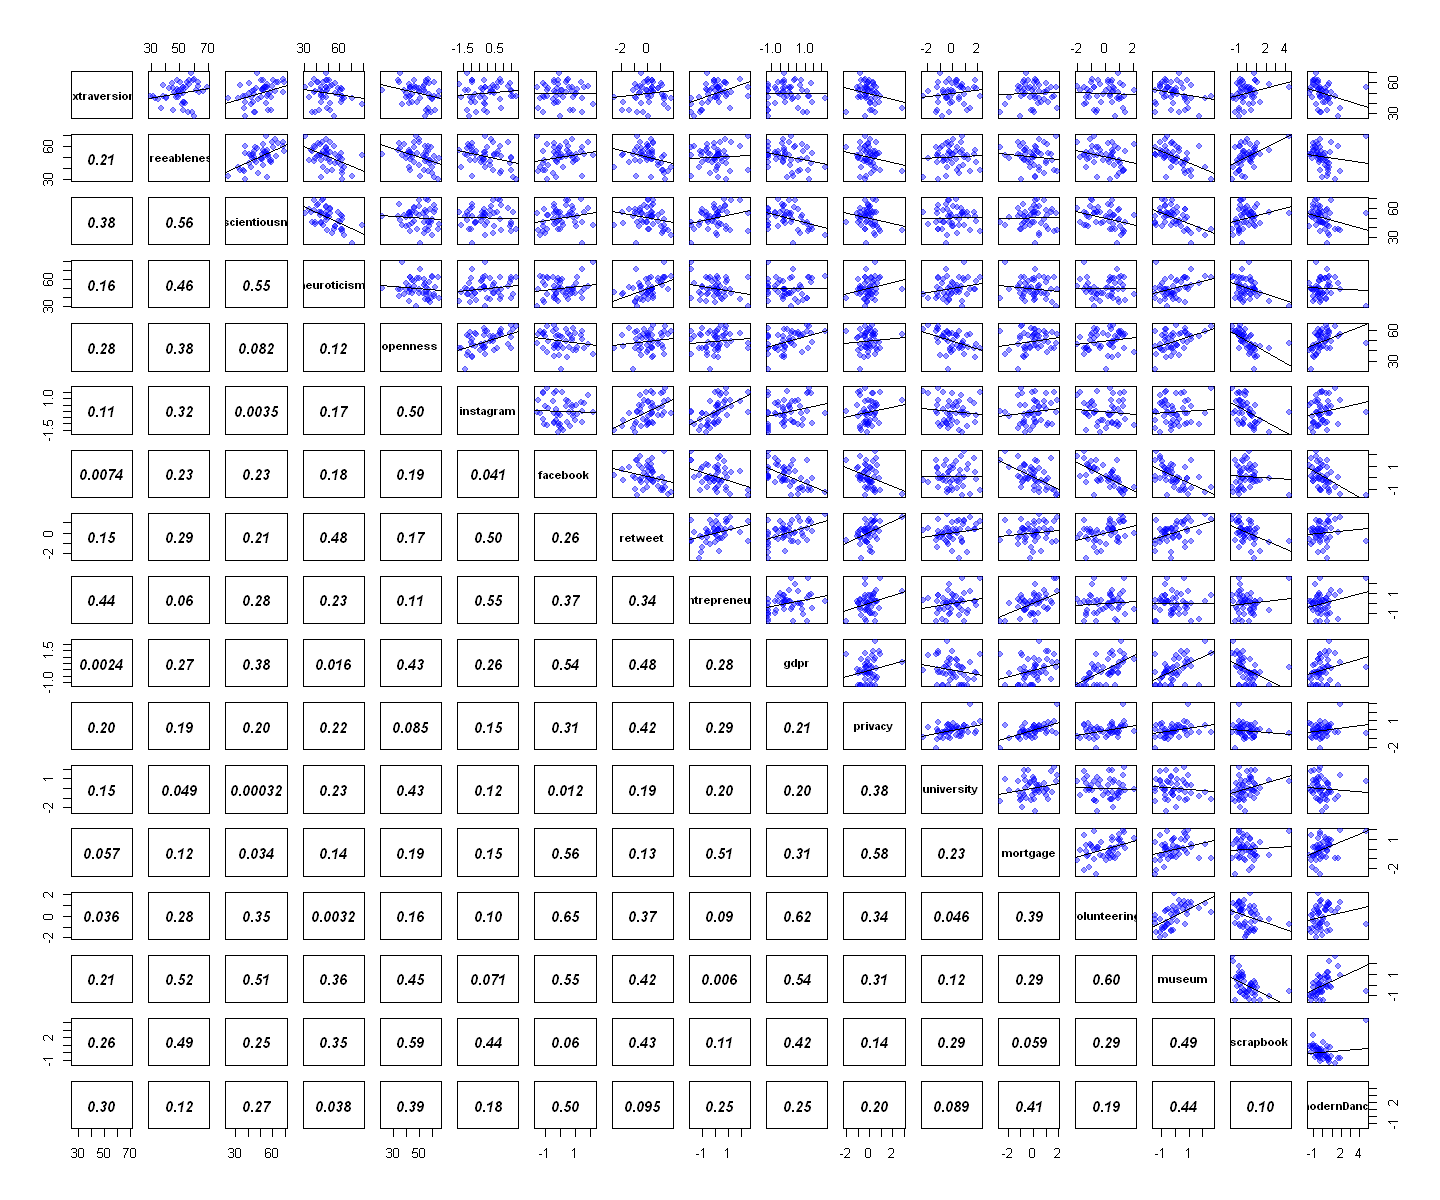

In [32]:
pairs(quant_data, upper.panel = reg, # replace HERE for panel.smooth #
      cex = 1.5, pch = 20, col = adjustcolor(4, .4), cex.labels = 0.8, font.labels = 2,  lower.panel = panel.cor)

### Variables that fit the criteriaa:  Facebook & Volunteering, Mortage & Facebook, Museum & Facebook, Scrapbook & Openness, gdpr & Facebook, museum & agreeable, agreeable & conscientiousness, museum & conscientiousness, gdpr & volunteering, gdpr & museum, mortage & privacy, volunteering & museum, entrepreneur & instagram, mortage & entrepreneur, conscientiousness & neuroticism.

## These relation can be then further studied by checking if relation makes sense or not. Need to remember 'RELATION DOES NOT MEAN CAUSATION'.

### Things to keep in mind before taking relations for its value. 1)Should not have too many outlier, 2) Data should be normally distributed for linear regression

## Regression between Museum and Volunteering

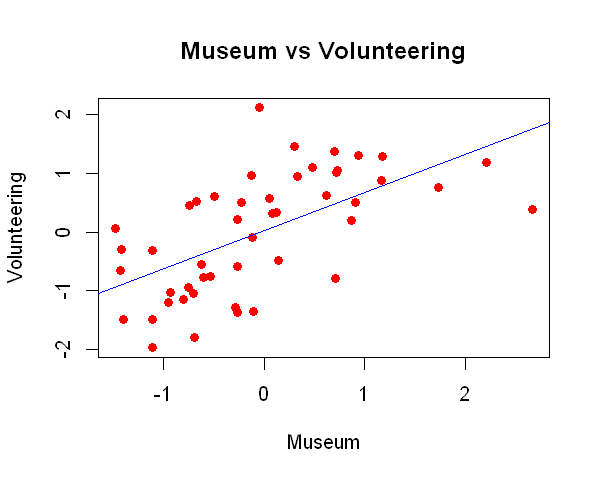

In [80]:
options(repr.plot.width=5, repr.plot.height=4)
plot(quant_data$museum, quant_data$volunteering, main="Museum vs Volunteering",
     xlab="Museum",ylab="Volunteering" , col = "red",pch=19)
abline(lm(volunteering ~ museum, data = quant_data), col = "blue")

#### The correlation of above relation is 0.6 which can be checked from above matrix.

#### y-intercept

In [90]:
lm(quant_data$volunteering ~ quant_data$museum)


Call:
lm(formula = quant_data$volunteering ~ quant_data$museum)

Coefficients:
      (Intercept)  quant_data$museum  
          0.02049            0.64991  


### Y-Intercept = 0.02049
### Slope = 0.64991

#### Thus equation of fitted line is:
### $Y$= 0.02049 + 0.64991$X$

In [81]:
reg_analysis <- lm(quant_data$volunteering ~ quant_data$museum)

In [82]:
summary(reg_analysis)


Call:
lm(formula = quant_data$volunteering ~ quant_data$museum)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.3757 -0.5912  0.0283  0.6099  2.1220 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)        0.02049    0.11800   0.174    0.863    
quant_data$museum  0.64991    0.12672   5.129  5.7e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.8162 on 46 degrees of freedom
Multiple R-squared:  0.3638,	Adjusted R-squared:   0.35 
F-statistic:  26.3 on 1 and 46 DF,  p-value: 5.7e-06


### Standard Error = 0.1091
### t-value = 5.129
### p-value = 5.7 e-06
### R-squared value = 0.3638

### Assuming other conditions for regression being ideal and checking relation-causation factor we see p-value<0.05, thus we conclude that the relation between museum and volunteering is significant

### R-squared value of 0.3638 indicates that the following variables explain 36.38% of variation in between these two.

## Graph indicating Confidence Interval in regression between Volunteering and Musuem

`geom_smooth()` using formula 'y ~ x'


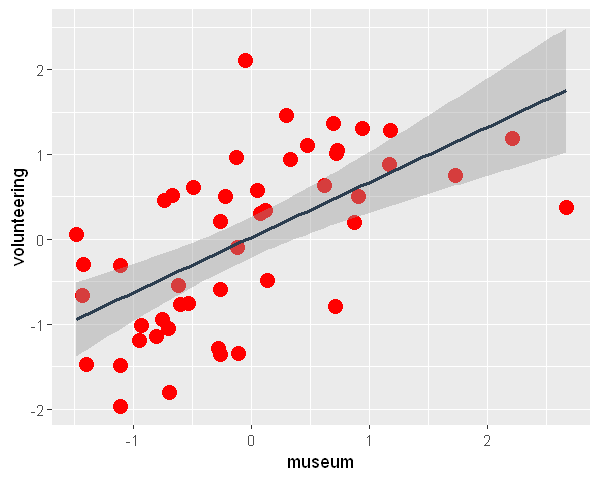

In [84]:
ggplot(quant_data, aes(x=museum, y=volunteering)) + 
  geom_point(color='red', size = 4) + 
  geom_smooth(method=lm, color='#2C3E50')

### Confidence Interval in numerical for all data points

In [89]:
reg.lm <- lm(quant_data$volunteering ~ quant_data$museum)
predict(reg.lm, interval = 'confidence')

fit,lwr,upr
-0.70090066,-1.05988991,-0.34191140
-0.06399279,-0.30192288,0.17393730
-0.59691570,-0.92636849,-0.26746291
0.05299029,-0.18559519,0.29157576
0.48842729,0.17998205,0.79687254
0.78738405,0.39343566,1.18133244
0.47542918,0.17022121,0.78063714
-0.46043544,-0.75523354,-0.16563735
-0.46693450,-0.76325518,-0.17061382
-0.90237151,-1.32397591,-0.48076711


## Assignment ends here.